## Compare importances

In [13]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import graphviz
import matplotlib.pyplot as plt

### Load regional data

In [14]:
regression_label = 'habitat_richness'
folder = "../Dataset"
file = "/bulgaria_out_closest_point_mean_handle_custom_set.csv"

bu = pd.read_csv(folder + file, index_col=['longitude', 'latitude'])
#df = df[df[regression_label] > 0]
y = bu[regression_label].values
X = bu.drop(columns=[regression_label]).values #returns a numpy array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Applying the log expands the distance between data points 
y_train = np.log(y_train)
y_test = np.log(y_test)

# Normalize the data
X_scaler = preprocessing.MinMaxScaler()
y_scaler = preprocessing.MinMaxScaler()

# Test values have to be normalized with the training mean and std
y_scaler.fit(y_train.reshape(-1, 1))
y_train = y_scaler.transform(y_train.reshape(-1, 1)).ravel()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()
y = y_scaler.transform(y.reshape(-1, 1)).ravel()
X_scaler.fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)
X = X_scaler.transform(X)

rfr_bu = RandomForestRegressor(n_estimators=100, max_depth=None, random_state = 42)
rfr_bu = rfr_bu.fit(X_train,y_train)
print("Random Forest validation score: ", rfr_bu.score(X_test, y_test))

Random Forest validation score:  0.9556325105187462


In [20]:
regression_label = 'habitat_richness'
folder = "../Dataset"
file = "/finland_out_closest_point_mean_handle_custom_set.csv"

fi = pd.read_csv(folder + file, index_col=['longitude', 'latitude'])
#df = df[df[regression_label] > 0]
y = fi[regression_label].values
X = fi.drop(columns=[regression_label]).values #returns a numpy array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Applying the log expands the distance between data points 
y_train = np.log(y_train)
y_test = np.log(y_test)

# Normalize the data
X_scaler = preprocessing.MinMaxScaler()
y_scaler = preprocessing.MinMaxScaler()

# Test values have to be normalized with the training mean and std
y_scaler.fit(y_train.reshape(-1, 1))
y_train = y_scaler.transform(y_train.reshape(-1, 1)).ravel()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()
y = y_scaler.transform(y.reshape(-1, 1)).ravel()
X_scaler.fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)
X = X_scaler.transform(X)

rfr_fi = RandomForestRegressor(n_estimators=100, max_depth=None, random_state = 42)
rfr_fi = rfr_fi.fit(X_train,y_train)
print("Random Forest validation score: ", rfr_fi.score(X_test, y_test))

Random Forest validation score:  0.7227258231923372


In [21]:
regression_label = 'habitat_richness'
folder = "../Dataset"
file = "/france_out_closest_point_mean_handle_custom_set.csv"

fr = pd.read_csv(folder + file, index_col=['longitude', 'latitude'])
#df = df[df[regression_label] > 0]
y = fr[regression_label].values
X = fr.drop(columns=[regression_label]).values #returns a numpy array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Applying the log expands the distance between data points 
y_train = np.log(y_train)
y_test = np.log(y_test)

# Normalize the data
X_scaler = preprocessing.MinMaxScaler()
y_scaler = preprocessing.MinMaxScaler()

# Test values have to be normalized with the training mean and std
y_scaler.fit(y_train.reshape(-1, 1))
y_train = y_scaler.transform(y_train.reshape(-1, 1)).ravel()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()
y = y_scaler.transform(y.reshape(-1, 1)).ravel()
X_scaler.fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)
X = X_scaler.transform(X)

rfr_fr = RandomForestRegressor(n_estimators=100, max_depth=None, random_state = 42)
rfr_fr = rfr_fr.fit(X_train,y_train)
print("Random Forest validation score: ", rfr_fr.score(X_test, y_test))

Random Forest validation score:  0.7746250246387534


In [ ]:
regression_label = 'habitat_richness'
folder = "../Dataset"
file = "/italy_out_closest_point_mean_handle_custom_set.csv"

it = pd.read_csv(folder + file, index_col=['longitude', 'latitude'])
#df = df[df[regression_label] > 0]
y = it[regression_label].values
X = it.drop(columns=[regression_label]).values #returns a numpy array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Applying the log expands the distance between data points 
y_train = np.log(y_train)
y_test = np.log(y_test)

# Normalize the data
X_scaler = preprocessing.MinMaxScaler()
y_scaler = preprocessing.MinMaxScaler()

# Test values have to be normalized with the training mean and std
y_scaler.fit(y_train.reshape(-1, 1))
y_train = y_scaler.transform(y_train.reshape(-1, 1)).ravel()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()
y = y_scaler.transform(y.reshape(-1, 1)).ravel()
X_scaler.fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)
X = X_scaler.transform(X)

rfr_it = RandomForestRegressor(n_estimators=100, max_depth=None, random_state = 42)
rfr_it = rfr_bu.fit(X_train,y_train)
print("Random Forest validation score: ", rfr_it.score(X_test, y_test))

In [ ]:
importances = rfr_bu.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr_bu.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

feat_names = list(bu.drop(columns=[regression_label]).columns.values) 

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feat_names[indices[f]], importances[indices[f]]))

names = [feat_names[i] for i in indices]
# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(30, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
importances = rfr_fi.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr_fi.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

feat_names = list(fi.drop(columns=[regression_label]).columns.values) 

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feat_names[indices[f]], importances[indices[f]]))

names = [feat_names[i] for i in indices]
# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(30, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
importances = rfr_fi.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr_fi.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

indices = indices[:20]
feat_names = list(fr.drop(columns=[regression_label]).columns.values) 

names = [feat_names[i] for i in indices]
# Plot the impurity-based feature importances of the forest
fig = plt.figure(figsize=(30, 10))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices],
        color="g", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), names, rotation=90)
plt.xlim([-1, len(indices)])
plt.show()

fig.savefig('fi_importances.png')

Feature ranking:
1. feature stl3 (0.254386)
2. feature str (0.106097)
3. feature ssrd (0.071394)
4. feature ssr (0.039744)
5. feature slhf (0.037175)
6. feature sp (0.035442)
7. feature tp (0.028810)
8. feature src (0.025818)
9. feature strd (0.024576)
10. feature lai_lv (0.021194)
11. feature swvl3 (0.018218)
12. feature TOCR-REF-NOR-NIR (0.017148)
13. feature swvl1 (0.016628)
14. feature ALDH-AL-DH-VI (0.016118)
15. feature ALBH-AL-BH-VI (0.015638)
16. feature swvl4 (0.013090)
17. feature lai_hv (0.012974)
18. feature TOCR-REF-NOR-SWIR (0.012959)
19. feature fal (0.012949)
20. feature stl2 (0.012643)
21. feature ALDH-AL-DH-BB (0.012302)
22. feature FAPAR300-FAPAR (0.012075)
23. feature FCOVER300-FCOVER (0.011810)
24. feature NDVI (0.011675)
25. feature skt (0.011465)
26. feature ALBH-AL-BH-NI (0.010198)
27. feature ALBH-AL-BH-BB (0.010149)
28. feature LAI300-LAI (0.009693)
29. feature ALDH-AL-DH-NI (0.009069)
30. feature SWI1km-SWI-002 (0.008385)
31. feature SWI1km-SWI-060 (0.007782)

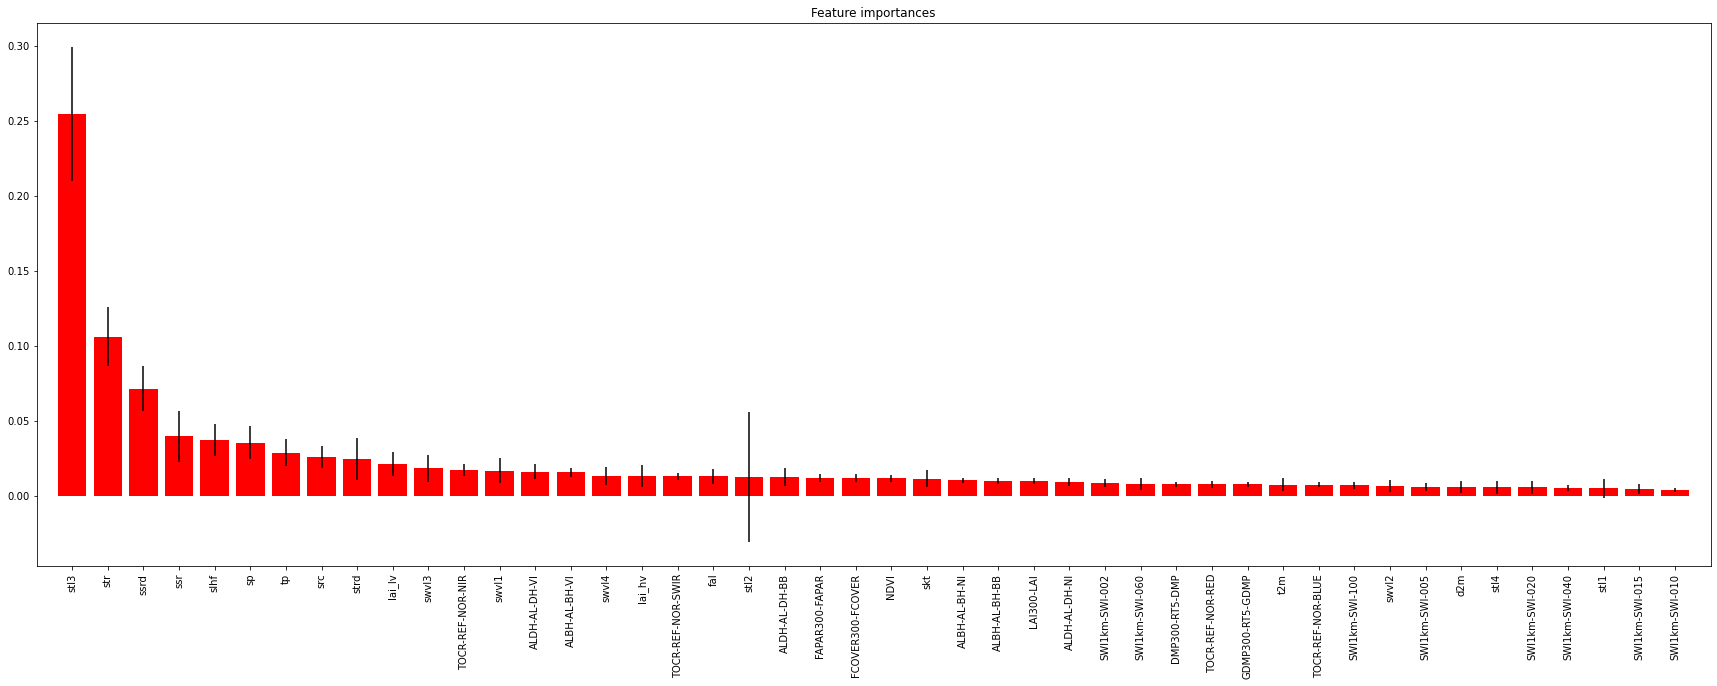

In [129]:
importances = rfr_it.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr_it.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

feat_names = list(it.drop(columns=[regression_label]).columns.values) 

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feat_names[indices[f]], importances[indices[f]]))

names = [feat_names[i] for i in indices]
# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(30, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [127]:
importances_fr = rfr_fr.feature_importances_
importances_it = rfr_it.feature_importances_
importances_bu = rfr_bu.feature_importances_
importances_fi = rfr_fi.feature_importances_
std_fr = np.std([tree.feature_importances_ for tree in rfr_fr.estimators_],axis=0)
std_it = np.std([tree.feature_importances_ for tree in rfr_it.estimators_],axis=0)
std_bu = np.std([tree.feature_importances_ for tree in rfr_bu.estimators_],axis=0)
std_fi = np.std([tree.feature_importances_ for tree in rfr_fi.estimators_],axis=0)

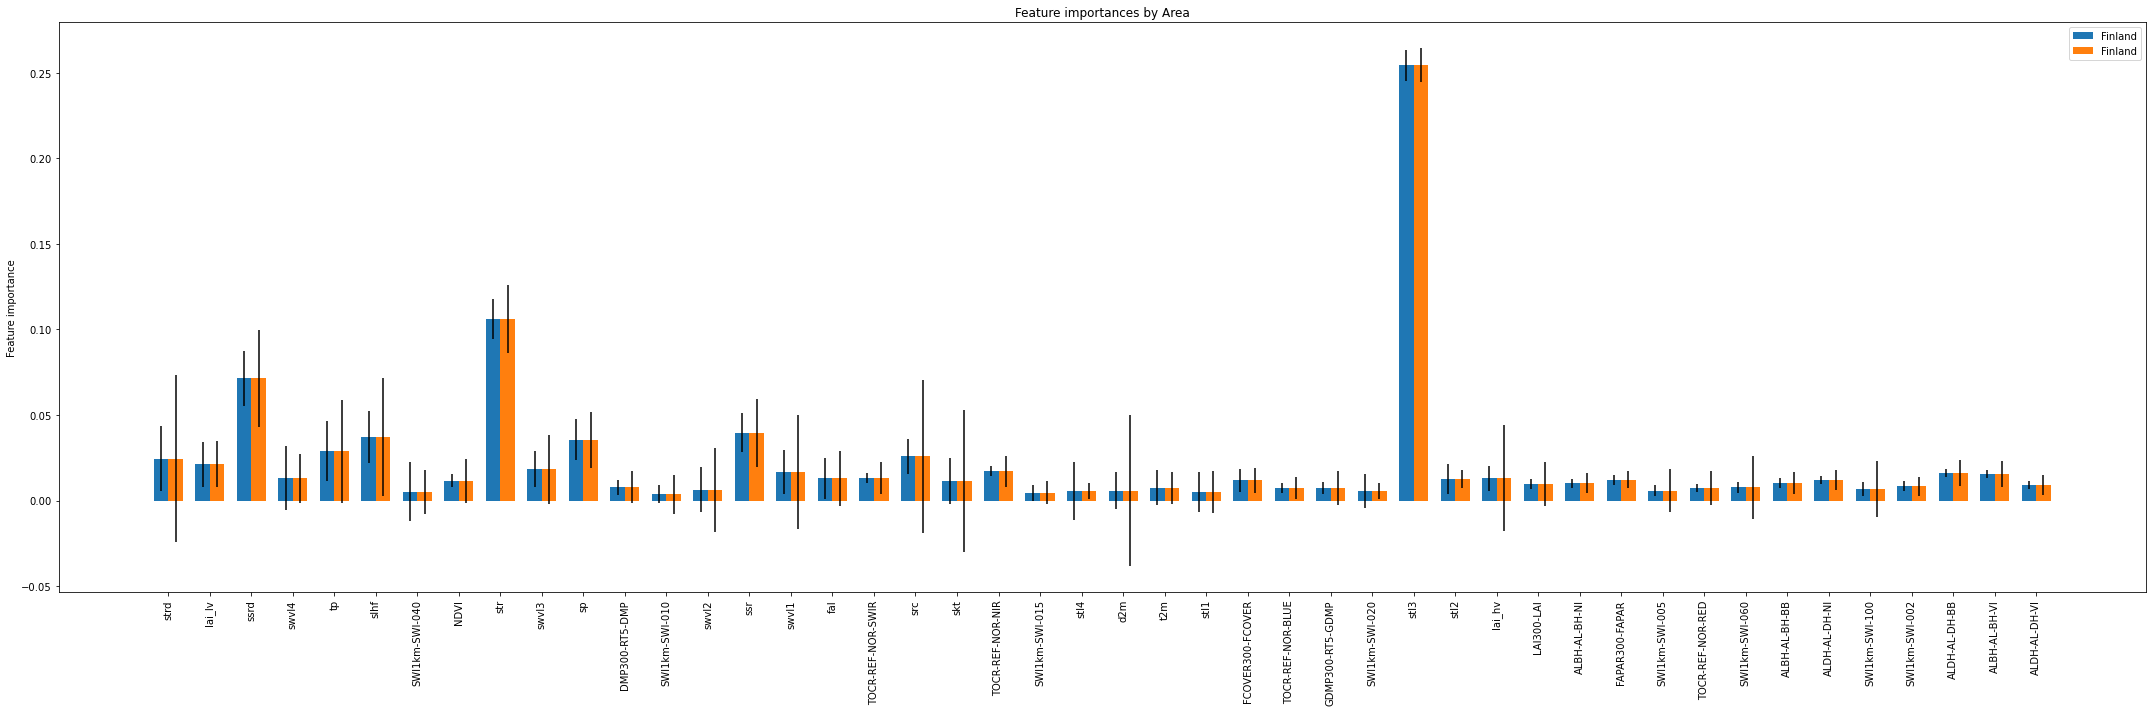

In [128]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

indices = np.argsort(importances_fi)[::-1]
#indices = indices[:20]
feat_names = list(bu.drop(columns=[regression_label]).columns.values) 
names = [feat_names[i] for i in indices]


labels = names
fr_means = importances_fr[indices]
it_means = importances_it[indices]
bu_means = importances_bu[indices]
fi_means = importances_fi[indices]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(30, 10))
rects1 = ax.bar(x - width/2, it_means, width, label='Finland', yerr=std_fi[indices])
#rects2 = ax.bar(x - width/4, it_means, width, label='Italy')
#rects3 = ax.bar(x + width/4, bu_means, width, label='Bulgaria')
rects4 = ax.bar(x + width/2, bu_means, width, label='Finland', yerr=std_fr[indices],)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Feature importance')
ax.set_title('Feature importances by Area')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

fig.tight_layout()

plt.show()